In [24]:
import pandas as pd
import matplotlib as plt
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
from scipy.stats import cauchy

<font size="5"><b>Problem 1</b></font> 

In [44]:
oldNN = {' ':  ['NA Bird', 'NA Person'],
        'True Bird': ['45', '3'],
         'True Person':['5','47']
        }
df = pd.DataFrame(oldNN)

print(df)

             True Bird True Person
0    NA Bird        45           5
1  NA Person         3          47


Inconsistency in assignment: there should be 52 pictures of people in the NA algorithm before the pandemic but there are 53. I decided to modify the table a bit so that the tables are consistent:

In [42]:
oldNA = {' ':  ['NA Bird', 'NA Person'],
        'True Bird': ['47', '1'],
         'True Person':['10','42']
        }
df = pd.DataFrame(oldNA)

print(df)

             True Bird True Person
0    NA Bird        47          10
1  NA Person         1          42


A.With the neural network algorithm, there are a total of 8 misidentifications (errors) while in the new algorithm there are 12 errors so the NN algorithm is actually better.

B. In this case, the NA algorithm is actually better for the zoo because there are less bird misidentifications. This means that the algorithm is less likely to keep the birds out of the aviary. The zoo only cares about keeping in the birds no matter how many people are locked in.

C. We know that 1% of photos being taken now are of people which means 99% of photos are of birds. We need to know the percentage of error from each algorithm so that we can apply it to the pandemic case. For the NN algorithm, the error is 3/48 = 0.625 (3+45 = 48) for true birds. Applying this error to 99 bird pictures, we get 6.2 NN person and 99 - 6.2 = 92.9. Similary for true person column, the error is 5/52 = 0.11. Applying this error to 1 person, we get 0.11 NN birds and 0.89 NN persons. This is done exactly the same for the new NA algorithm.

In [46]:
newNN = {' ':  ['NA Bird', 'NA Person'],
        'True Bird': ['92.8', '6.2'],
         'True Person':['0.11','0.89']
        }
df = pd.DataFrame(newNN)

print(df)

             True Bird True Person
0    NA Bird      92.8        0.11
1  NA Person       6.2        0.89


In [47]:
newNA = {' ':  ['NA Bird', 'NA Person'],
        'True Bird': ['96.9', '2.1'],
         'True Person':['0.19','0.81']
        }
df = pd.DataFrame(newNA)

print(df)

             True Bird True Person
0    NA Bird      96.9        0.19
1  NA Person       2.1        0.81


<font size="5"><b>Problem 2</b></font> 

A. From Wikipedia we have the following expression:

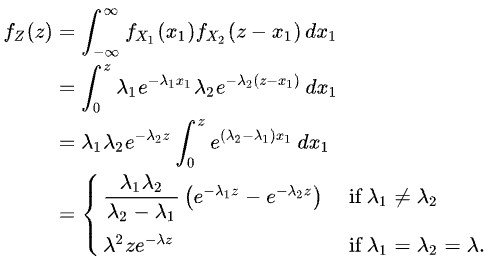

In [1]:
from IPython.display import Image
Image(filename='sum_two_exponentials.jpg')

it also says that the sum of two independent distributions is the convolution of their individual PDFs. X1 and X2 are the independent exponential random variables with rate parameters λ1 and λ2 respectively. Z is the sum of the distributions.

Text(0.5, 1.0, 'Probability Density Function of 1 Exponential Distribution')

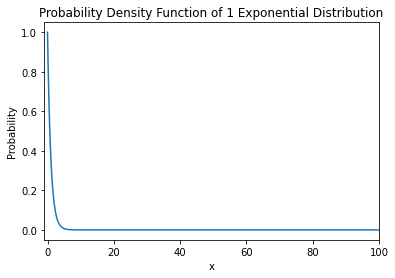

In [32]:
x = np.linspace(0,100,500)
dist = expon.pdf(x)
sum = np.convolve(dist,dist)
plt.plot(x,dist)
plt.xlim([-1,100])
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Probability Density Function of 1 Exponential Distribution')

Now let's plot the sum:


Text(0.5, 1.0, 'Probability Density Function of 2 Convolved Exponential Distributions')

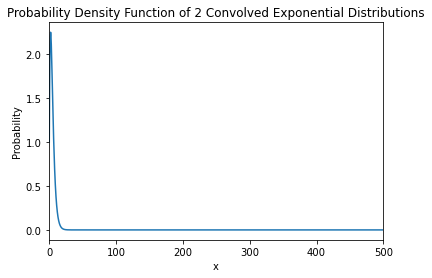

In [33]:
sumx = np.linspace(0,500,len(sum))
plt.plot(sumx,sum)
plt.xlim([-1,500])
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Probability Density Function of 2 Convolved Exponential Distributions')

We can see that the peak is scaled up and the distribution is expanded overall, exactly what we would expect from convolution.

B.According to Wolfram MathWorld, the ratio of two normal distributions (also known as the normal ratio distribution) is the same as the 'Cauchy Distribution' given by:

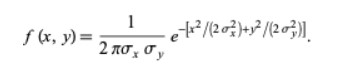

In [23]:
from IPython.display import Image
Image(filename='normal_ratio_distribution.jpg')

https://mathworld.wolfram.com/NormalRatioDistribution.html

Text(0.5, 1.0, 'Probability Density Function of Cauchy Distribution')

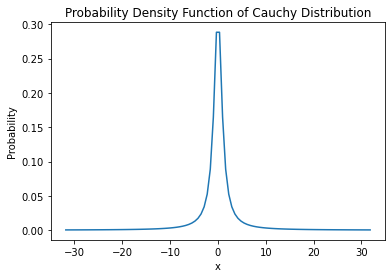

In [34]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(cauchy.ppf(0.01),cauchy.ppf(0.99),100)
cauch = cauchy.pdf(x)
ax.plot(x,cauchy.pdf(x))
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Probability Density Function of Cauchy Distribution')

Text(0.5, 1.0, 'Probability Density Function of Cauchy Distribution (log scale)')

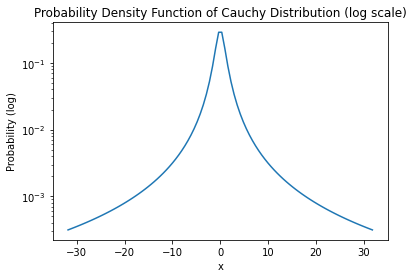

In [35]:
fig, ax = plt.subplots(1, 1)
ax.semilogy(x,cauchy.pdf(x))
plt.xlabel('x')
plt.ylabel('Probability (log)')
plt.title('Probability Density Function of Cauchy Distribution (log scale)')

The above two plots show a cauchy distribution which is very similar to a normal distribution, as expected. This is because the cauchy distribution is merely the ratio of two zero mean normal distributions.

C.It is possible to have a two dimensional gaussian distribution (also known as a normal distribution function). The distribution will have a smeared spot in the middle as shown:

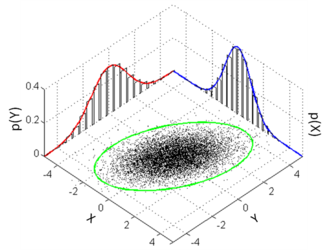

In [30]:
from IPython.display import Image
Image(filename='multivariate_normal.png')

According to Wikipedia, the PDF of the amplitude of the vector is given by:

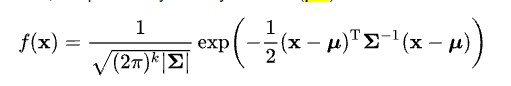

In [31]:
from IPython.display import Image
Image(filename='pdf_vector.jpg')

where μ is the mean of the distribution of the function, x is the x-coordinate in the function, and k is the number of dimensions in distribution. The amplitude of the vector is just the square root of the square of the difference of distance in each dimension. This is why the amplitude is always positive, otherwise it would be complex.

https://en.wikipedia.org/wiki/Multivariate_normal_distribution